##**The Impact of Screen Time on Children’s Mental Health**

**Research question:**

"Is time spent in front of screens a predictor of mental health in 10 -17 year olds?"

Exploring the relationship between screentime and mental health in children between 10-17 years

Dataset: Kiggs Dataset 
- KiGGS is a cohort longitudinal study where a large group of children, adolescents and young adults (aged 0-17 years) in Germany were followed over a long time (Baseline: 2003-2006, Wave 1: 2009-2012, Wave 2: 2014-2017).
- Data was collected through medical examinations and interviews.
- Nationwide health survey with data about: physical and mental health status, health behaviour, psycho-social factors, social background and use of health care services. 
- Their goal was to describe health trends in this population and identify risk and protective factors.

Reference:
- Mauz E, Lange M, Houben R, Hoffmann R, Allen J, Gößwald A, et al. Cohort profile: KiGGS cohort longitudinal study on the health of children, adolescents and young adults in Germany. International Journal of Epidemiology. 2020 Apr 1;49(2):375–375k. 

**Input**
* k1091 ➡ TV_time - Wie lange Fernsehen/Video?/How long TV/Video? 
* k1092 ➡ Game_time - Wie lange Spielkonsole? How long Game console? 
* k1093 ➡ Computer_time - Wie lange Computer/Internet? How long Computer/Internet
* k1095 ➡ Phone_time - Wie lange Handy?/How long cell phone? 
* Tot_time - total screen time (self computed)
* age2
* sex
* schichtz ➡ ses - socioeconomic status 

**Output**

* totsdq_e ➡ SDQmetric - total SDQ score (metric) 
* sdqauf_e ➡ SDQcategorical - total SDQ score (categorical)
 * 0(normal) ➡ 0(normal)
 * 1(bordeline) and 2(abnormal) ➡ 1(not-normal) 


# Importing Data

SAV files are created by SPSS (Statistical Package for the Social Sciences), which is an application widely used for statistical analysis. The SAV format consists of a dataset as well as a dictionary that represent the dataset, it saves data in rows and columns.

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload() #works in Google Chrome

Saving KiGGS03_06.sav to KiGGS03_06.sav


In [ ]:
pip install pyreadstat #installing latest package of pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 31.8 MB/s eta 0:00:00


In [ ]:
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
kiggs_raw, meta = pyreadstat.read_sav("KiGGS03_06.sav") #reading sav file into pandas

In [ ]:
kiggs_raw.head() #displaying first 5 rows of KiGGS dataset as pandas dataframe

,PIDNR,PPoint,OW,STALA,wKiGGS,wKGSLab,wKGSVitD,sex,sexa,age2,...,S_Soja,S_Karott,S_Kartof,S_GApfel,S_Liesch,S_Roggen,S_Clados,S_Asperg,S_Birke,S_Beifus
0,1.0,82.0,1.0,2.0,0.787814,0.777576,NaN,1.0,1.0,7.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,2.0,102.0,1.0,1.0,0.237334,0.214002,0.188483,1.0,1.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3.0,102.0,1.0,1.0,0.236580,0.211179,0.201237,2.0,2.0,5.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,4.0,78.0,1.0,1.0,0.363842,0.341644,0.407207,2.0,2.0,8.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,5.0,118.0,1.0,1.0,0.420490,NaN,NaN,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(meta.column_names_to_labels)

{'PIDNR': 'Fallnummer (PUF)', 'PPoint': 'Sample Pointnummer (PUF)', 'OW': 'Ost/West geografisch', 'STALA': 'Stadt-Land (Gemeindegrößenklasse)', 'wKiGGS': 'Gewichtungsfaktor KiGGS', 'wKGSLab': 'Gewichtungsfaktor KiGGS Labor (Blut)', 'wKGSVitD': 'Gewichtungsfaktor Vitamin D', 'sex': 'Geschlecht', 'sexa': 'Geschlecht', 'age2': '2-Jahresaltersgruppe (vollendet)', 'agegrp': 'Altersgruppe', 'AUSL': 'Ausländer lt. Einwohnermeldeamt', 'migrant': 'Migrantenstatus', 'mbtyp': 'Messbogentyp', 'efbtyp': 'ElternFBTyp', 'kfbtyp': 'KinderFBTyp', 'capi': 'Arztinterview', 'lab': 'Status Blut-/Urindaten', 'ffq': 'Ernährungsbogen', 'e001B': 'Hauptaufenthaltsort (EFB) aggregiert', 'e004': 'Fragebogenbeantworter', 'e005': 'Leibliche (Halb-) Geschwister', 'e005B1': 'Anzahl älterer Geschwister (leiblich)', 'e005B2': 'Anzahl jüngerer Geschwister (leiblich)', 'e005B3': 'Anzahl gleichaltriger Geschwister (leiblich)', 'e006': 'Geschwister (im Haushalt)', 'e006B1': 'Anzahl älterer Geschwister (im Haushalt)', 'e006

# Descriptive statistics about the overall dataset

In [ ]:
kiggs_raw.info() #info about the KiGGS dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17640 entries, 0 to 17639
Columns: 1206 entries, PIDNR to S_Beifus
dtypes: float64(1204), object(2)
memory usage: 162.3+ MB


This shows us that the dataset has 17640 rows with 0 to 17639 entries per column. It also shows that we have 1206 columns, the first being PIDNR an the last S_Beifus. Next, you can see that the columns have mostly float64 as a datatype, but also 2 objects. Lastly, this also shows the size the dataframe uses in memory, which is 162.3 MB. 


In [ ]:
kiggs_raw.describe().round(3) #main descriptives for every variable in KiGGS

,PIDNR,PPoint,OW,STALA,wKiGGS,wKGSLab,wKGSVitD,sex,sexa,age2,...,S_Soja,S_Karott,S_Kartof,S_GApfel,S_Liesch,S_Roggen,S_Clados,S_Asperg,S_Birke,S_Beifus
count,17640.000,17640.000,17640.000,17640.000,17640.000,14386.000,10015.000,17640.000,17640.000,17640.000,...,13033.000,13015.000,13007.000,13000.000,13052.000,13042.000,13046.000,13042.000,13049.000,13044.000
mean,8820.917,84.189,1.666,2.520,1.000,1.000,1.000,1.491,1.491,5.006,...,1.938,1.905,1.918,1.909,1.776,1.791,1.981,1.975,1.860,1.888
std,5092.795,48.054,0.472,1.072,0.529,0.557,0.506,0.500,0.500,2.526,...,0.242,0.294,0.275,0.287,0.417,0.407,0.137,0.157,0.347,0.315
min,1.000,1.000,1.000,1.000,0.129,0.112,0.130,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,4410.750,43.000,1.000,2.000,0.574,0.578,0.589,1.000,1.000,3.000,...,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000
50%,8820.500,84.000,2.000,3.000,0.997,0.980,1.054,1.000,1.000,5.000,...,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000
75%,13231.250,126.000,2.000,3.000,1.325,1.295,1.289,2.000,2.000,7.000,...,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000
max,17641.000,167.000,2.000,4.000,4.654,4.505,5.004,2.000,2.000,9.000,...,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000


In [ ]:
kiggs_raw.mode()[:1] #showing the mode of every variable

,PIDNR,PPoint,OW,STALA,wKiGGS,wKGSLab,wKGSVitD,sex,sexa,age2,...,S_Soja,S_Karott,S_Kartof,S_GApfel,S_Liesch,S_Roggen,S_Clados,S_Asperg,S_Birke,S_Beifus
0,1.0,160.0,2.0,3.0,0.173479,4.504571,5.003761,1.0,1.0,5.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


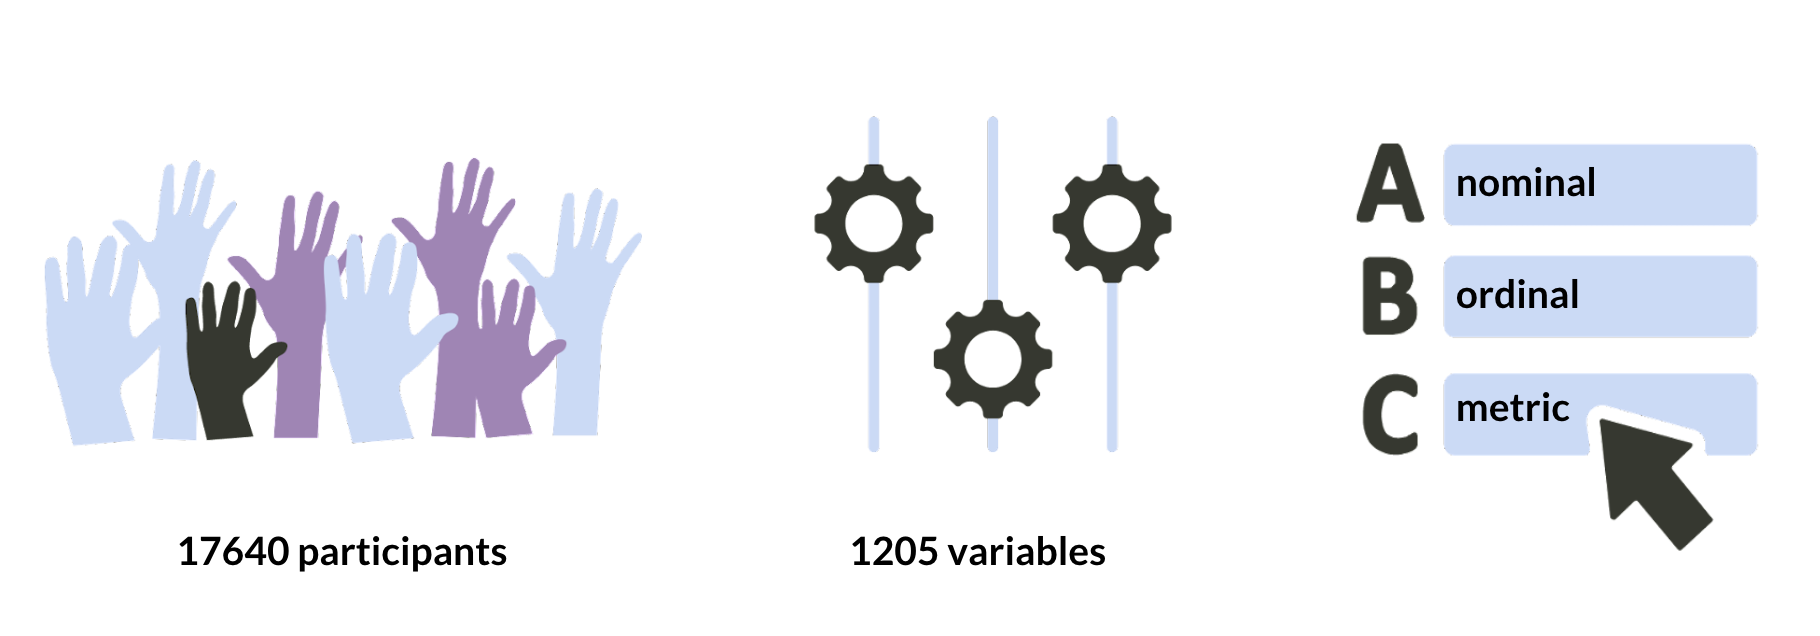

## Demographic Statistics About the Subjects:

In [ ]:
kiggs_demo=kiggs_raw[['sex','age2','OW','migrant', 'schichtz']] #subset with just demographic variables 
kiggs_demo.head()

,sex,age2,OW,migrant,schichtz
0,1.0,7.0,1.0,2.0,2.0
1,1.0,6.0,1.0,2.0,1.0
2,2.0,5.0,1.0,2.0,2.0
3,2.0,8.0,1.0,2.0,2.0
4,1.0,3.0,1.0,2.0,2.0


In [ ]:
kiggs_demo.describe()

,sex,age2,OW,migrant,schichtz
count,17640.000000,17640.000000,17640.000000,17560.000000,17214.000000
mean,1.490646,5.005952,1.665590,1.852506,1.978448
std,0.499927,2.526153,0.471797,0.354608,0.731439
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000
50%,1.000000,5.000000,2.000000,2.000000,2.000000
75%,2.000000,7.000000,2.000000,2.000000,3.000000
max,2.000000,9.000000,2.000000,2.000000,3.000000


### **Sex Distribution:** 

* 1 - Male
* 2 - Female

Is very balanced in the dataset with 50.9% male and 49.1% female.

In [ ]:
kiggs_raw['sex'].value_counts() #counts per agegroup
sex_labels = meta.variable_value_labels.get('sex', {})#getting label names 
value_counts = kiggs_raw['sex'].value_counts().rename(sex_labels) #renaming with label names
value_counts.apply(lambda x : x/len(kiggs_raw)*100).round(3) #percentages of each age group using lambda on counts

Männlich    50.935
Weiblich    49.065
Name: sex, dtype: float64

<Axes: xlabel='sex', ylabel='count'>

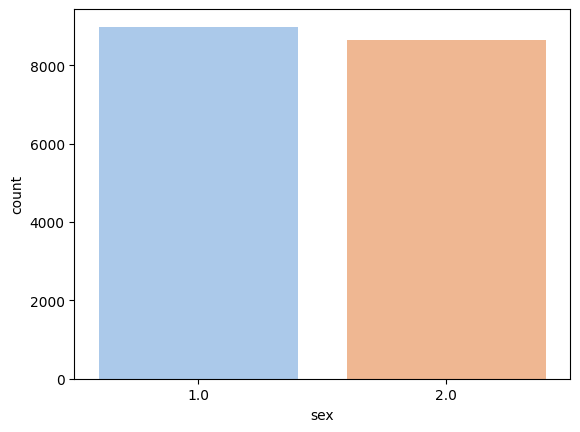

In [ ]:
sns.set_palette("pastel")
sns.countplot(x='sex', data=kiggs_demo) #countplot for sex

### *Age Distribution:*
* 1 - 0-1 years old
* 2 - 2-3 years old
* 3 - 4-5 years old
* 4 - 6-7 years old
* 5 - 8-9 years old
* 6 - 10-11 years old
* 7 - 12-13 years old
* 8 - 14-15 years old
* 9 - 16-17 years old

Is also relatively balanced, but there are a bit less very young children and a bit less older children in the dataset. Most kids are 8-9 years old.

<Axes: xlabel='age2', ylabel='count'>

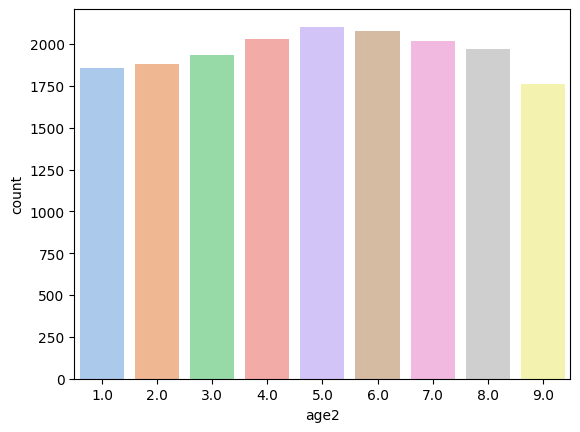

In [ ]:
sns.countplot(x='age2', data=kiggs_demo)

In [ ]:
kiggs_raw['age2'].value_counts() #counts per agegroup
age2_labels = meta.variable_value_labels.get('age2', {})#getting label names 
value_counts = kiggs_raw['age2'].value_counts().rename(age2_labels) #renaming with label names
value_counts.apply(lambda x : x/len(kiggs_raw)*100).round(3) #percentages of each age group 

8 - 9 J.      11.927
10 - 11 J.    11.769
6 - 7 J.      11.519
12 - 13 J.    11.440
14 - 15 J.    11.179
4 - 5 J.      10.969
2 - 3 J.      10.652
0 - 1 J.      10.544
16 - 17 J.    10.000
Name: age2, dtype: float64

### **Socioeconomic status:**
* 1 - low socioeconomic status
* 2 - middle socioeconomic status
* 3 - high socioeconomic status

Dominated by middle class families (45%)



<Axes: xlabel='schichtz', ylabel='count'>

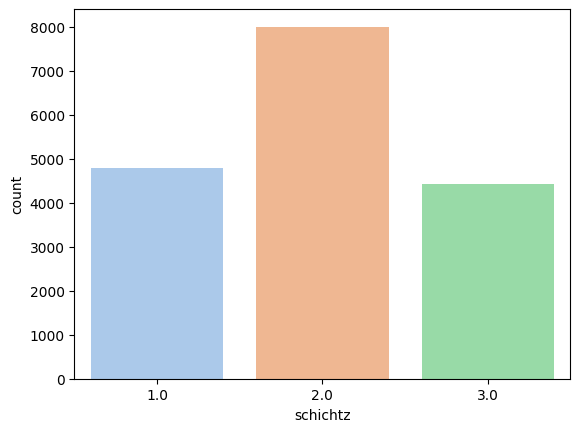

In [ ]:
sns.countplot(x='schichtz', data=kiggs_demo)

In [ ]:
pd.crosstab(kiggs_demo.schichtz, columns='count')

col_0,count
schichtz,
1.0,4794
2.0,7997
3.0,4423


In [ ]:
kiggs_raw['schichtz'].value_counts() #counts per agegroup
schichtz_labels = meta.variable_value_labels.get('schichtz', {})#getting label names 
value_counts = kiggs_raw['schichtz'].value_counts().rename(schichtz_labels) #renaming with label names
value_counts.apply(lambda x : x/len(kiggs_raw)*100).round(3) #percentages of each age group using lambda on counts

Mittlerer Sozialstatus    45.334
Niedriger Sozialstatus    27.177
Hoher Sozialstatus        25.074
Name: schichtz, dtype: float64

### Regions in Germany;
* 1 - East
* 2 - West

66% are from West Germany

<Axes: xlabel='OW', ylabel='count'>

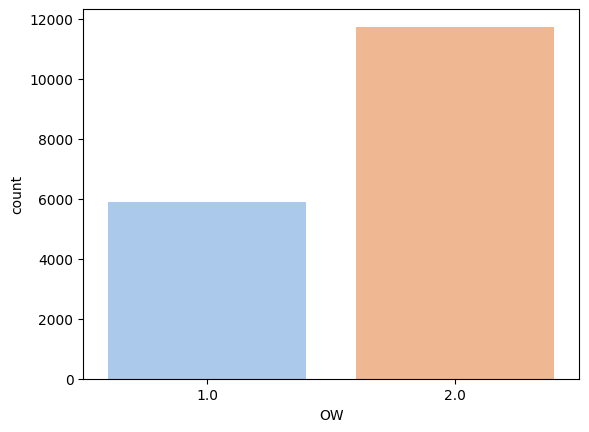

In [ ]:
sns.countplot(x='OW', data=kiggs_demo)

In [ ]:
kiggs_raw['OW'].value_counts() #counts per agegroup
OW_labels = meta.variable_value_labels.get('OW', {})#getting label names 
value_counts = kiggs_raw['OW'].value_counts().rename(OW_labels) #renaming with label names
value_counts.apply(lambda x : x/len(kiggs_raw)*100).round(3) #percentages of each age group using lambda on counts

West    66.559
Ost     33.441
Name: OW, dtype: float64

### **Migration status:**
* 1 - Migrant
* 2 - Non-Migrant 
Only about 15% are of Migrant origin 

<Axes: xlabel='migrant', ylabel='count'>

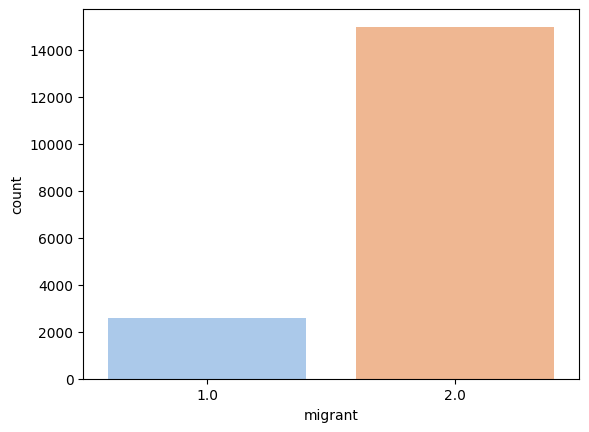

In [ ]:
sns.countplot(x='migrant', data=kiggs_demo)

In [ ]:
kiggs_raw['migrant'].value_counts() #counts per agegroup
migrant_labels = meta.variable_value_labels.get('migrant', {})#getting label names 
value_counts = kiggs_raw['migrant'].value_counts().rename(migrant_labels) #renaming with label names
value_counts.apply(lambda x : x/len(kiggs_raw)*100).round(3) #percentages of each age group using lambda on counts

Nicht-Migrant    84.864
Migrant          14.683
Name: migrant, dtype: float64

# Variables of interest

**Screen Time**

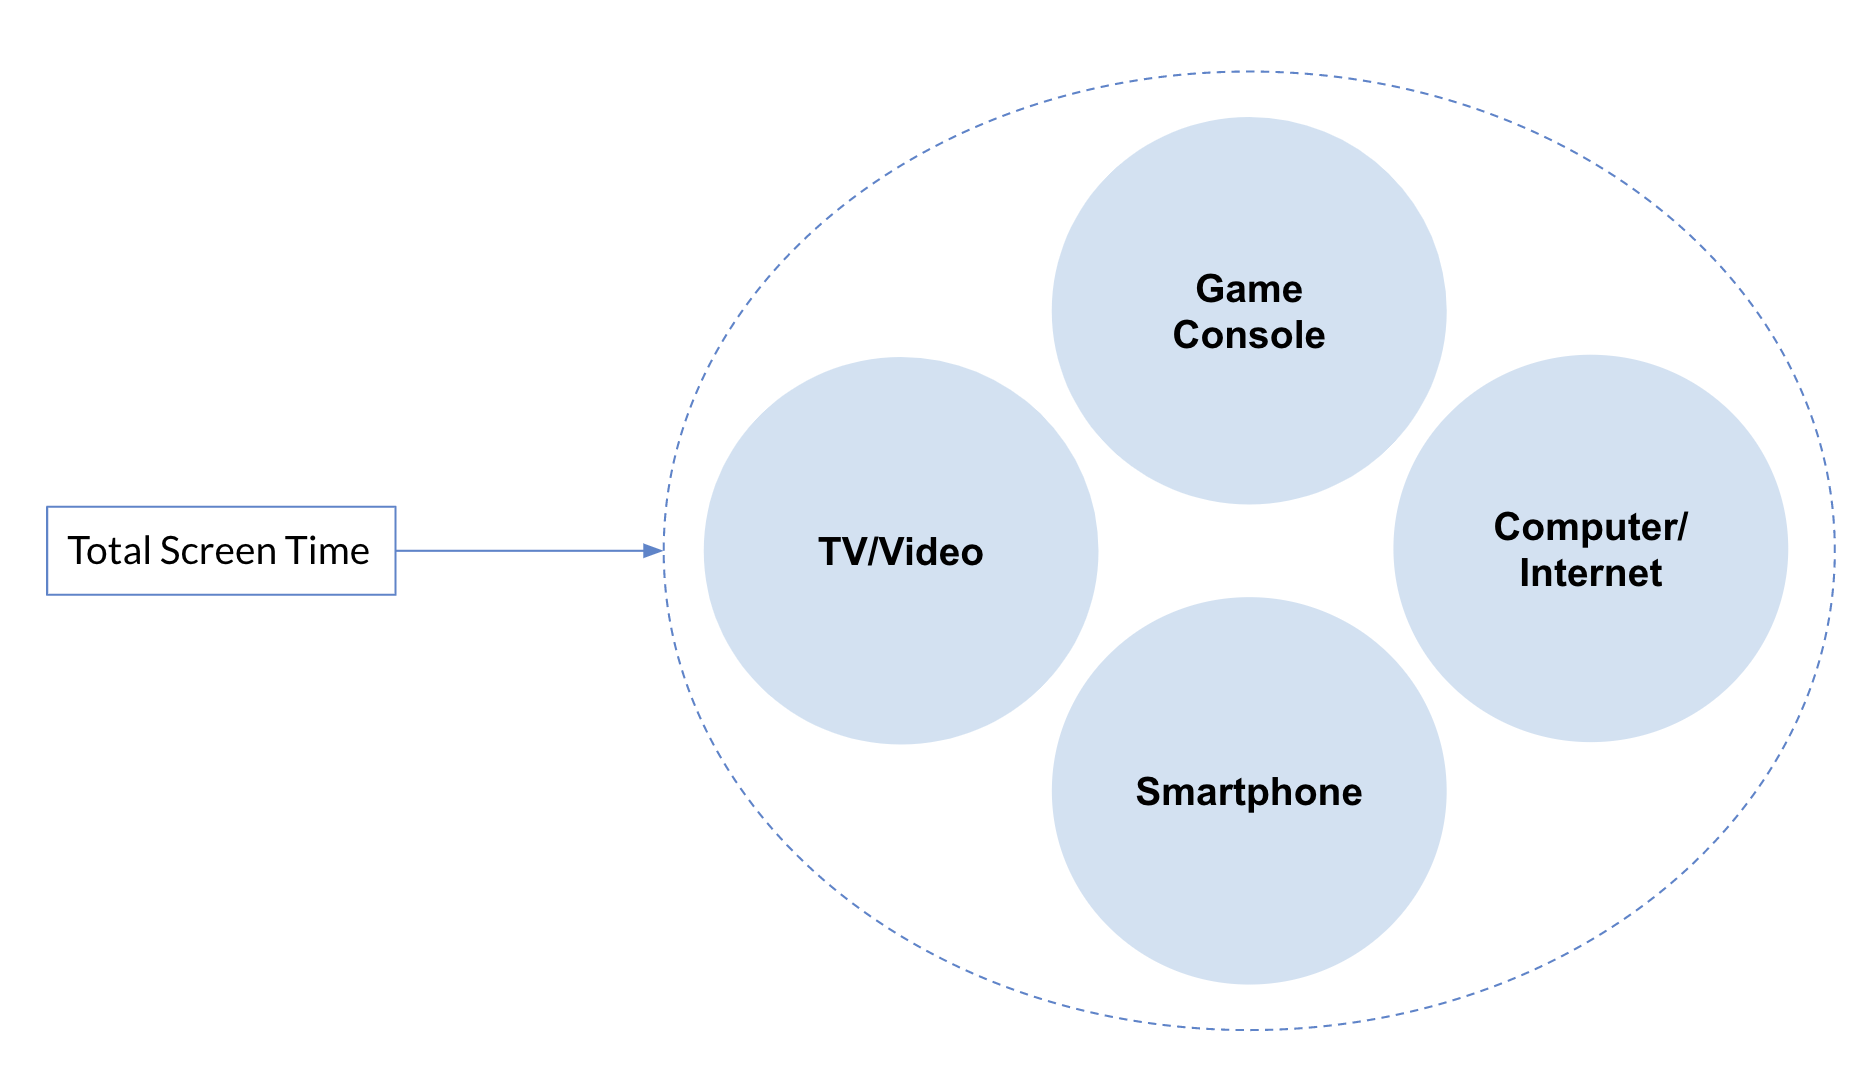

**Mental Health**
* Using the SDQ - Strength and Difficulties Questionnaire
* Behavioral screening questionnaire 
* Made for children/adolescents from 2-17 years old
* Normed and validated in German samples
* Child-, parent- and teacher-version →  Using: Parent version


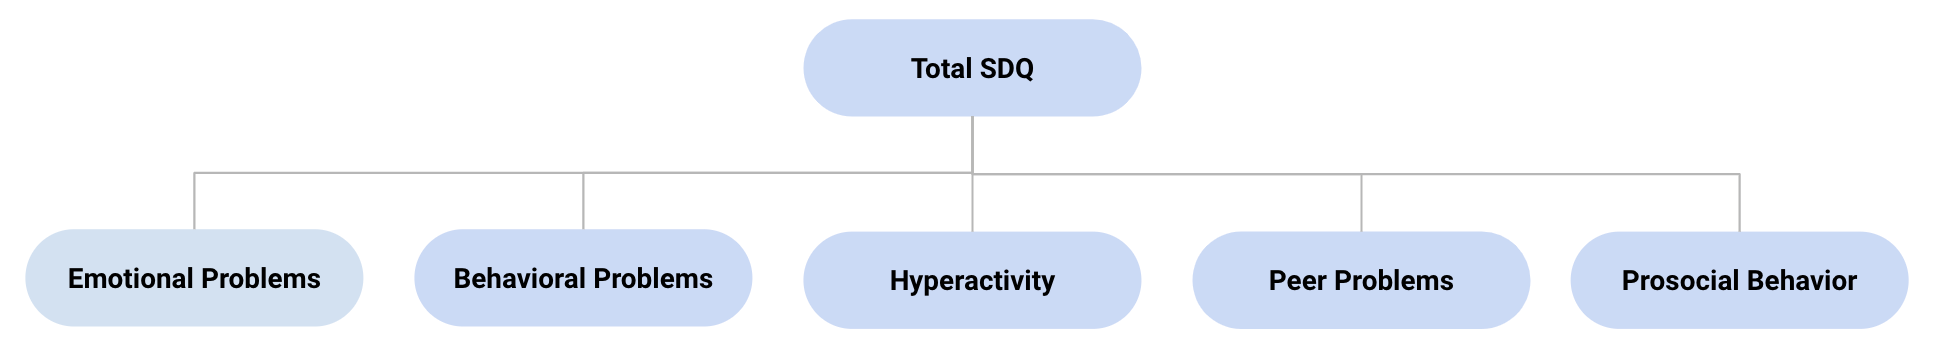

Others

Age; Sex; Socioeconomic status; Total sleep per day


In [ ]:
#create subset of variables of interest, using indexing and some sociodemographic variables
kiggs_sub = kiggs_raw[['sex','age2','schichtz','k1091','k1092', 'k1093','k1095','totsdq_e','sdqauf_e']]
kiggs_sub

,sex,age2,schichtz,k1091,k1092,k1093,k1095,totsdq_e,sdqauf_e
0,1.0,7.0,2.0,2.0,1.0,3.0,4.0,8.0,0.0
1,1.0,6.0,1.0,NaN,NaN,NaN,NaN,11.0,0.0
2,2.0,5.0,2.0,NaN,NaN,NaN,NaN,9.0,0.0
3,2.0,8.0,2.0,3.0,1.0,1.0,3.0,13.0,0.0
4,1.0,3.0,2.0,NaN,NaN,NaN,NaN,11.0,0.0
...,...,...,...,...,...,...,...,...,...
17635,1.0,4.0,2.0,NaN,NaN,NaN,NaN,20.0,2.0
17636,1.0,7.0,1.0,2.0,3.0,2.0,1.0,4.0,0.0
17637,1.0,4.0,1.0,NaN,NaN,NaN,NaN,12.0,0.0
17638,1.0,8.0,2.0,3.0,1.0,5.0,2.0,1.0,0.0


## Data Preprocessing

In [ ]:
#renaming variables
kig = kiggs_sub.rename(columns={'schichtz':'ses','k1091': 'TV_time', 'k1092': 'Game_time', 'k1093':'Computer_time', 'k1095':'Phone_time', 'totsdq_e':'SDQmetric', 'sdqauf_e':'SDQcategorical'})

# Creating new variable that combines all screen times, as this may be useful later on
kig['Tot_time'] = kig.TV_time + kig.Game_time + kig.Computer_time + kig.Phone_time

#Remove all age2 values for 0-9 years, because SDQ for parents was only filled in for kids older than that
kig=kig[~kig['age2'].isin([1, 2, 3, 4,5])] 

# Making SDQ have only two categories, normal 0, and not normal 1 
kig.loc[kig.SDQcategorical == 2, 'SDQcategorical'] = 1








<ipython-input-24-928c72e53248>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kig.loc[kig.SDQcategorical == 2, 'SDQcategorical'] = 1


In [ ]:
#check agegroups in our sample
kig['age2'].value_counts() #counts per agegroup
age2_labels = meta.variable_value_labels.get('age2', {})#getting label names 
value_counts = kig['age2'].value_counts().rename(age2_labels) #renaming with label names
print(value_counts.apply(lambda x : x/len(kig)*100).round(2)) #percentages of each age group 

10 - 11 J.    26.51
12 - 13 J.    25.77
14 - 15 J.    25.19
16 - 17 J.    22.53
Name: age2, dtype: float64


In [ ]:
# check mental health distributon ratio in our data
print(kig['SDQcategorical'].value_counts(lambda x : x/len(kig)*100).round(2)) # percentages of each mental health outcome using lambda on counts

0.0    0.85
1.0    0.15
Name: SDQcategorical, dtype: float64


## Data description and visualization


In [ ]:
kig.describe().round(2) # descriptives for our dataset

,sex,age2,ses,TV_time,Game_time,Computer_time,Phone_time,SDQmetric,SDQcategorical,Tot_time
count,7830.00,7830.00,7577.00,6706.00,6574.00,6640.00,6656.00,7599.00,7599.00,6494.00
mean,1.49,7.44,1.97,3.00,1.57,2.26,1.97,8.15,0.15,8.80
std,0.50,1.11,0.72,0.89,0.91,1.03,1.08,5.30,0.36,2.26
min,1.00,6.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00
25%,1.00,6.00,1.00,2.00,1.00,1.00,1.00,4.00,0.00,7.00
50%,1.00,7.00,2.00,3.00,1.00,2.00,2.00,7.00,0.00,9.00
75%,2.00,8.00,2.00,3.00,2.00,3.00,2.00,11.00,0.00,10.00
max,2.00,9.00,3.00,5.00,5.00,5.00,5.00,35.00,1.00,20.00


In [ ]:
kig.mode()

,sex,age2,ses,TV_time,Game_time,Computer_time,Phone_time,SDQmetric,SDQcategorical,Tot_time
0,1.0,6.0,2.0,3.0,1.0,2.0,2.0,5.0,0.0,8.0


**Screen Time:**

* Highest screen time for TV/Video ➡ with a mean of a little more than 1-2h per day, and standard deviation of less than 1.

* Lowest screen time for game console ➡ with a mean of less than 0.5h per day

* Screen time for internet/computer is a little less than 0.5h per day on average

* Screen time for cellphone is a little bit more than 0.5h per day on average

* Both time spend on the cellphone and time spend on internet/computer have the largest variance with a std of 1.082 which is around 0.5-1h.

**Mental Health:**

* The descriptives show that in our sample children have on average a normal score, but there are some included with an abnormal score, with the highest score being 35. 

**Mode:**
* Sex: Female
* Age2: 10-11 years old
* ses: medium socioeconomic status


* TV_time: Ca. 1-2 hours
* Game_time: Not at all
* Computer_time: Ca. 0.5 hours
* Phone_time: Ca. 0.5 hours

➡ All these are very low, they might be higher nowadays. It would be interesting to use a newer KiGGS dataset.


* SDQmetric: 5, which is rather low and indicates normal mental health.  
* SDQcategorical: 0, indicates normal mental health.

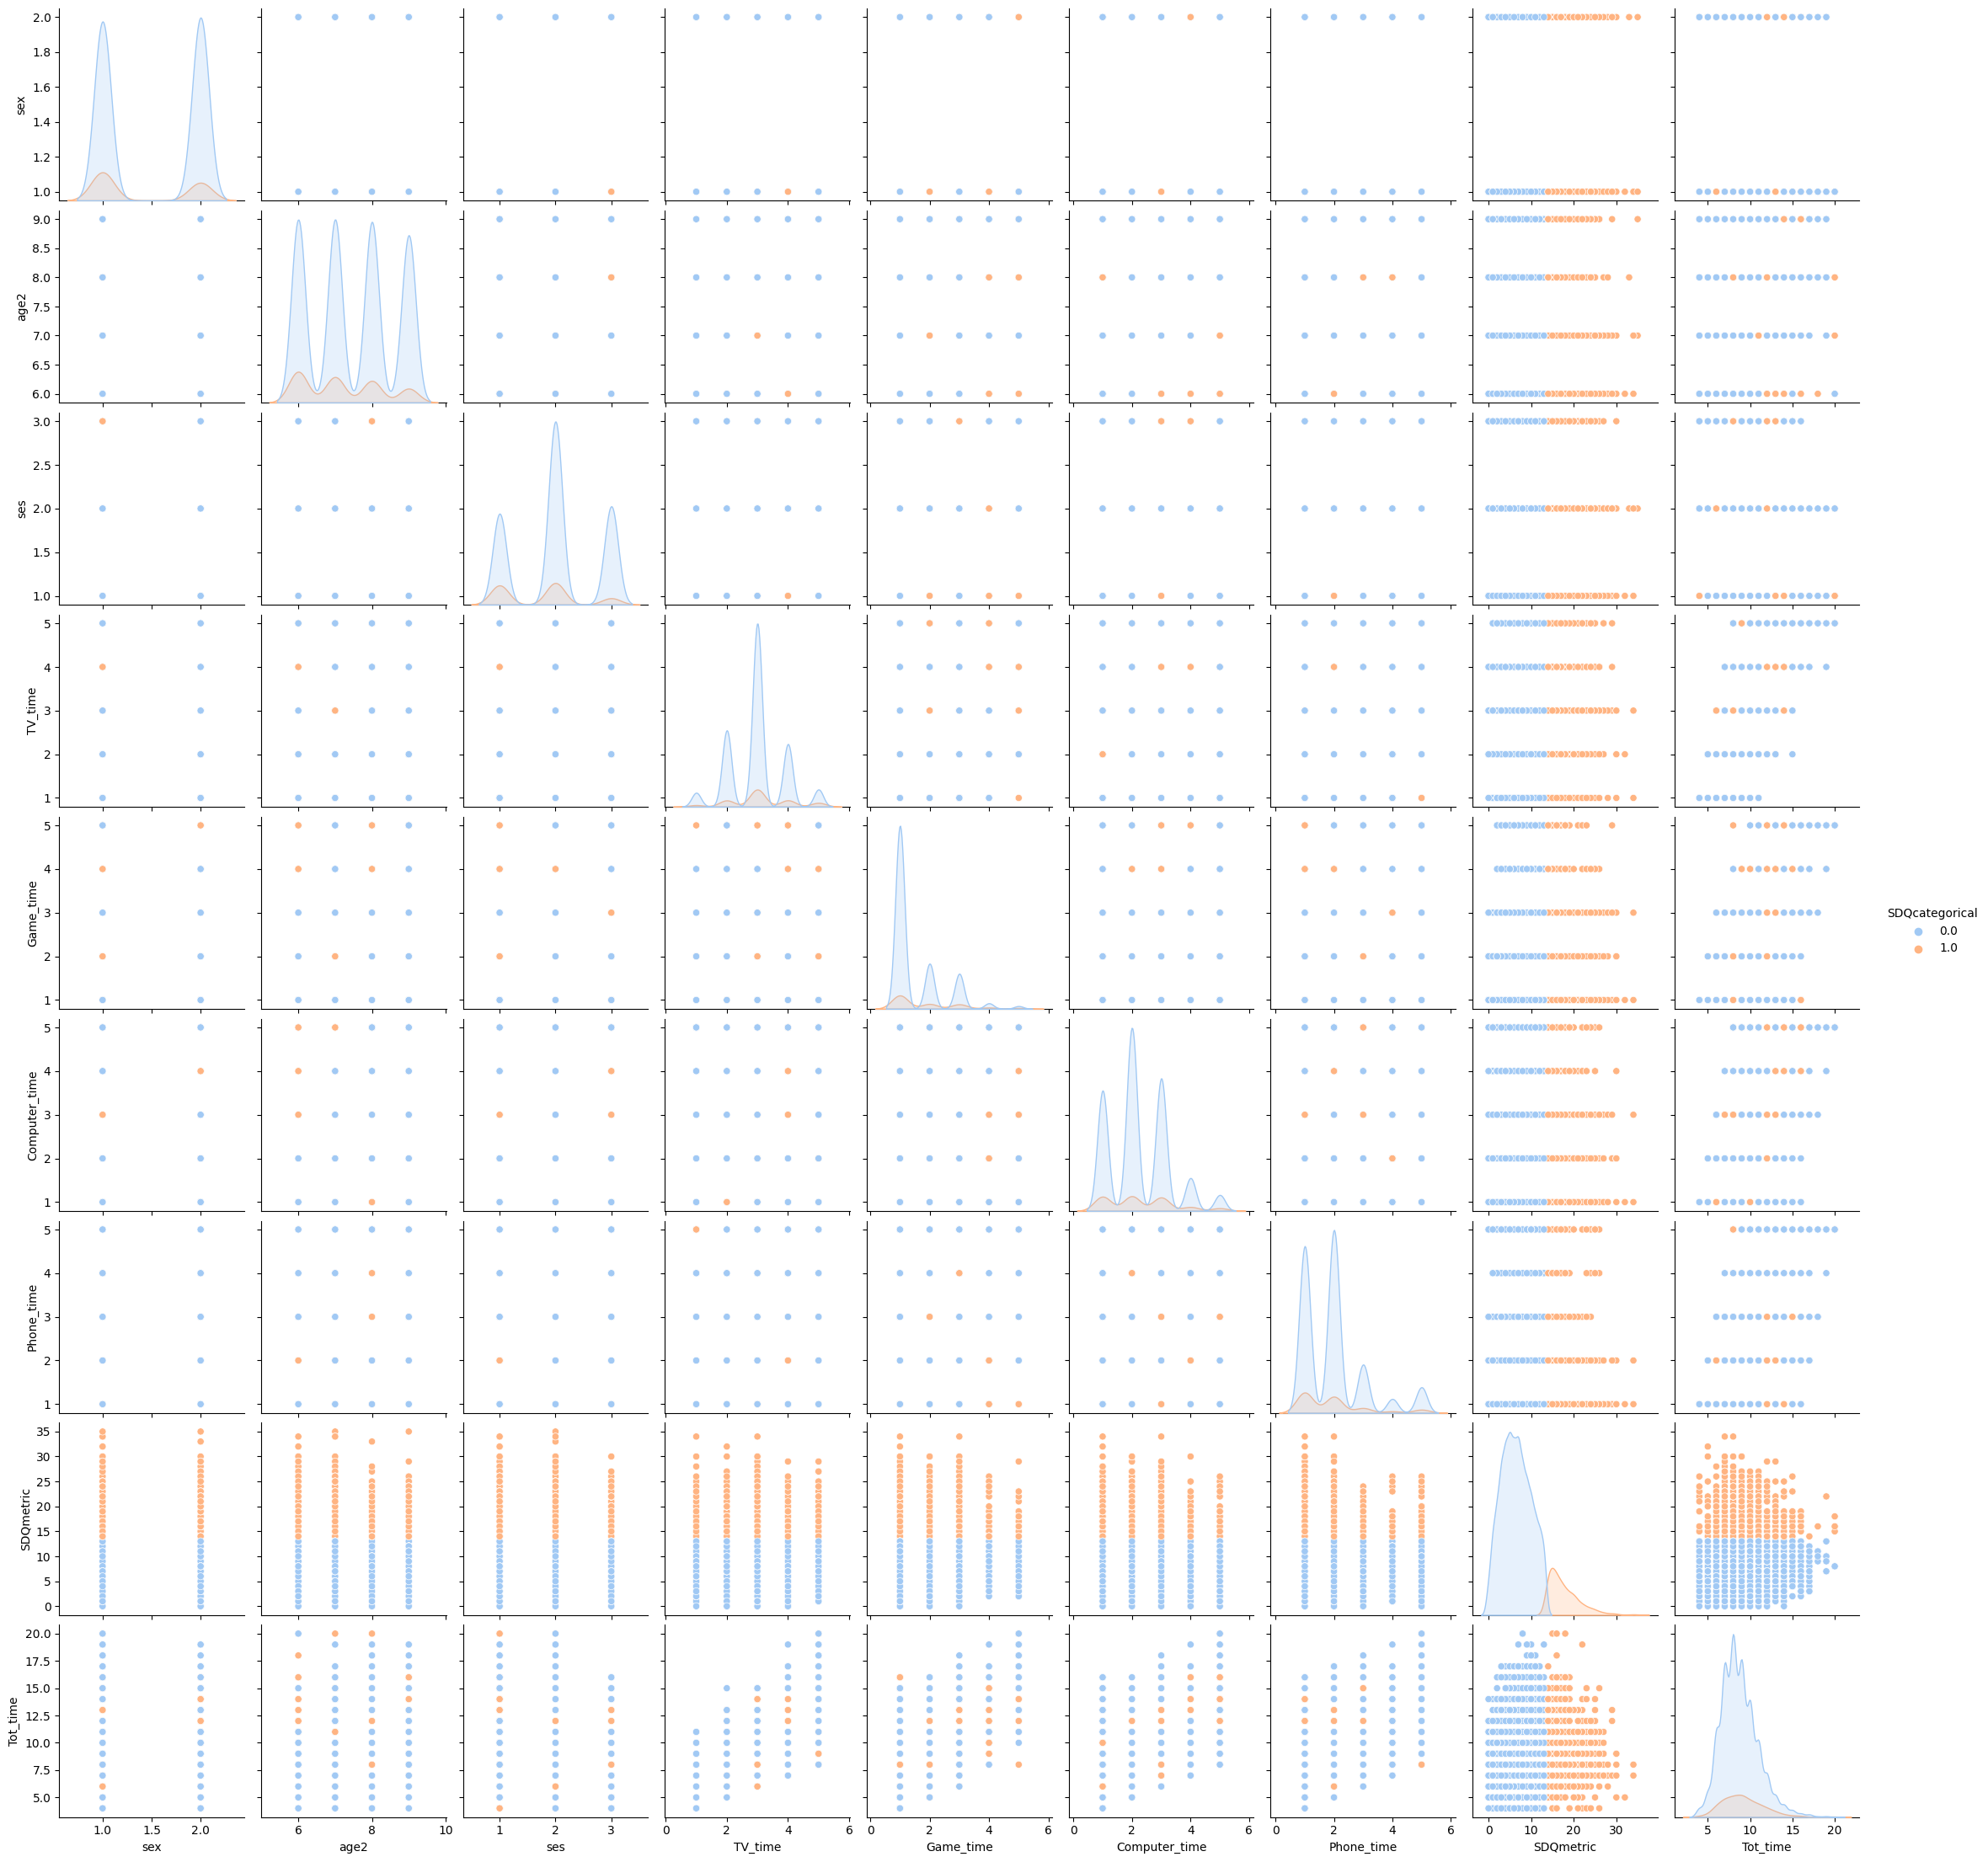

In [ ]:
# Pairplot for screentime and sdq total scores
sns.pairplot(kig, hue='SDQcategorical', palette='pastel')

<Axes: xlabel='Tot_time', ylabel='SDQmetric'>

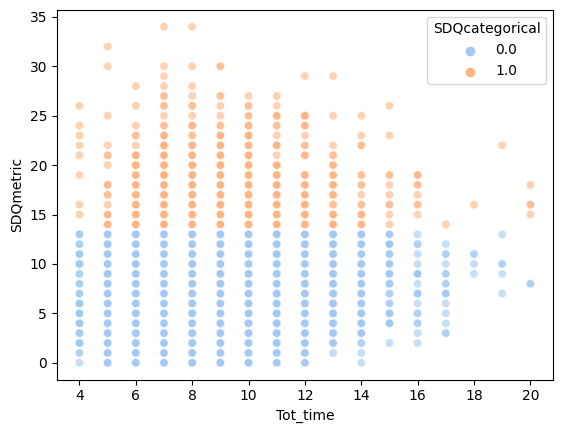

In [ ]:
sns.scatterplot(data=kig, x='Tot_time', y='SDQmetric',hue='SDQcategorical', palette='pastel', alpha=0.6)

Distribution of kids with abnormal mental wellness is right skewed with frequency being most common amongst kids with total screentime value of 6-12.


# Dealing with NAs

In [ ]:
# Delete all rows with at least one missing value
kig = kig.dropna()

# Print the number of remaining subjects
print("Number of remaining subjects:", len(kig))

Number of remaining subjects: 6249


To avoid unnecessary bias in the data , I decided to drop all rows with NAs and we still have enough number of subjects

# Correlation analysis

In [ ]:
from scipy.stats import spearmanr

## Phone time and SDQ categories

In [ ]:
rho, p = spearmanr(kig['Phone_time'], kig['SDQcategorical'])
print('rho:',rho)
print('p-value:', p)

rho: -0.028114657259329868
p-value: 0.026251176251729624


Not statistically-significant weak negative correlation, meaning mental health slightly better with higher phone time but not significant.

## Total screen time and SDQ categories

In [ ]:
rho, p = spearmanr(kig['Tot_time'], kig['SDQcategorical'])
print('rho:',rho)
print('p-value:', p)

rho: 0.058532741702247634
p-value: 3.6550069124324326e-06


Statistically significant weak positive correlation, meaning, higher total screen time reflects worse mental state 

## Socio-economic status and SDQ categories

In [ ]:
rho, p = spearmanr(kig['ses'], kig['SDQcategorical'])

# Print Spearman Rank correlation and p-value
print('rho:',rho)
print('p-value:', p)

# Interpret p-value 
if p < 0.05:
  print("Conclusion: We reject the null hypothesis.")

rho: -0.13383721249855052
p-value: 2.26473019996779e-26
Conclusion: We reject the null hypothesis.


The Spearman Rank value is negative, this means with a higher socioeconomic status the sample shows better mental health. However, this association is rather weak since it is only -0.14. The p-value shows that it is significant and there is an association between the socioeconomic status and the SDQ.

In [ ]:
# Cross tabulation between SES and SDQcategorical
CrosstabResult=pd.crosstab(index=kig['ses'],columns=kig['SDQcategorical'])
print(CrosstabResult)

SDQcategorical   0.0  1.0
ses                      
1.0             1304  337
2.0             2656  402
3.0             1431  119


Axes(0.125,0.11;0.775x0.77)


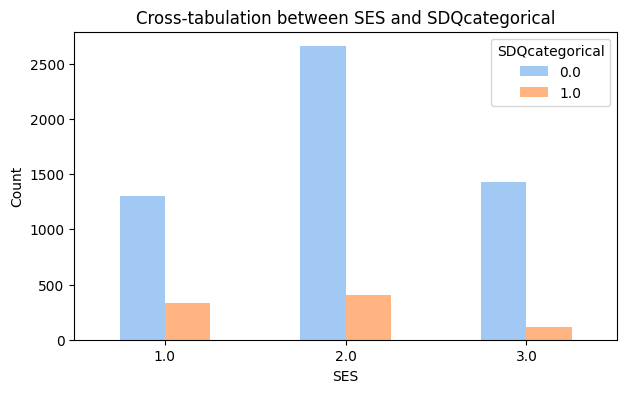

In [ ]:
# Define color palette
pastel = sns.color_palette("pastel")

# Grouped bar chart between SES and SDQcategorical
fig1=CrosstabResult.plot.bar(figsize=(7,4), rot=0, color=pastel)

# Add axis labels and title
fig1.set_xlabel("SES")
fig1.set_ylabel("Count")
fig1.set_title("Cross-tabulation between SES and SDQcategorical")

print(fig1)

The bar plot shows that there is a small negative association.

# Further analysis

In [ ]:
# Converting sex, age and others to categorical variables
kig['sex'] = pd.Categorical(kig.sex)
kig['age2'] = pd.Categorical(kig.age2)
kig['ses'] = pd.Categorical(kig.ses)
kig['TV_time'] = pd.Categorical(kig.TV_time)
kig['Game_time'] = pd.Categorical(kig.Game_time)
kig['Computer_time'] = pd.Categorical(kig.Computer_time)
kig['Phone_time'] = pd.Categorical(kig.Phone_time)
kig['SDQcategorical'] = pd.Categorical(kig.SDQcategorical)

kig.info()

In [ ]:
#Preperation for the x_ticks
#Undo the renaming for the columns
columns={'schichtz':'ses',
         'k1091': 'TV_time',
         'k1092': 'Game_time',
         'k1093':'Computer_time',
         'k1095':'Phone_time', 
         'totsdq_e':'SDQmetric',
         'sdqauf_e':'SDQcategorical'}
#inverse the dictionary
new_columns = dict((v,k) for k,v in columns.items())

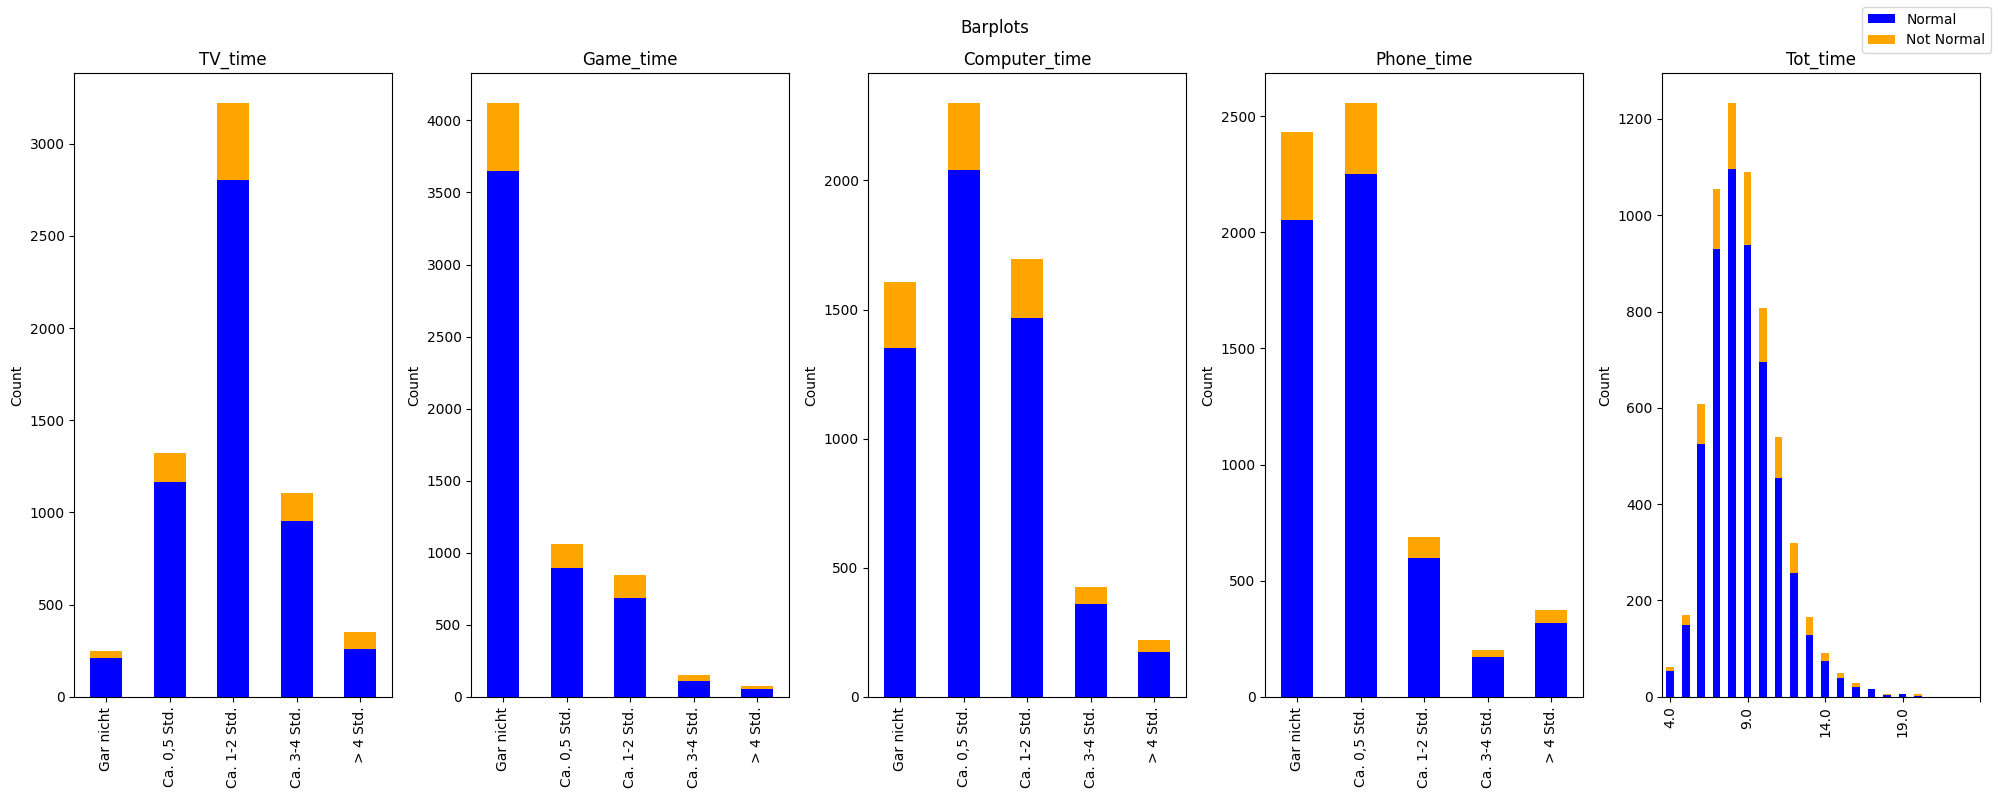

In [ ]:
# Changeables
vis_attrs = ["TV_time", "Game_time", "Computer_time", "Phone_time","Tot_time"]
vis_split = "SDQcategorical"
legend_labels = ["Normal", "Not Normal"]

# Prepare the dataset
data = kig[vis_attrs + [vis_split]]

# Create subplots for each variable
fig, axs = plt.subplots(1, len(vis_attrs),figsize=(20,8))

# Loop through each variable and plot a stacked bar chart
for i, var in enumerate(vis_attrs):
    # Count the frequencies
    counts = data.groupby([var, vis_split]).size().reset_index(name='counts')
    # Pivot the table to create a stacked bar chart
    pivoted = counts.pivot(index=var, columns=vis_split, values='counts')
    # Plot the stacked bar chart with the specified colors
    pivoted.plot(kind='bar', stacked=True, color=['blue', 'orange'], ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_ylabel("Count")
    axs[i].legend().remove()
    axs[i].set_xlabel("")
    if var != "Tot_time":
        x_labels = meta.variable_value_labels.get(new_columns[var],{})
        x_labels_list = list(x_labels.values())
        x_labels_list.pop(0)
        axs[i].set_xticks(ticks=[0,1, 2, 3, 4], labels = x_labels_list)
    else:
        axs[i].set_xticks(ticks=[0, 5, 10, 15, 20])

# Create a legend for all subplots
fig.legend(labels=legend_labels)

fig.suptitle("Barplots")
fig.tight_layout()
plt.show()


Based on the visual analysis of the provided plots, it appears that the distribution of TV_time is approximately symmetric. Conversely, the distribution of Game-Time is noticeably asymmetric and right-skewed. Similarly, the distributions of Computer and Phone time also exhibit asymmetry, which suggests that these variables have an uneven distribution of values. Moreover, the distribution of Tot_time is also asymmetric, as its peak does not appear to be centered in the middle of the data, but rather skewed, with a longer tail on the right side indicating a minor frequency of higher values. Overall, these observations provide important insights into the nature of the data and its underlying statistical properties.

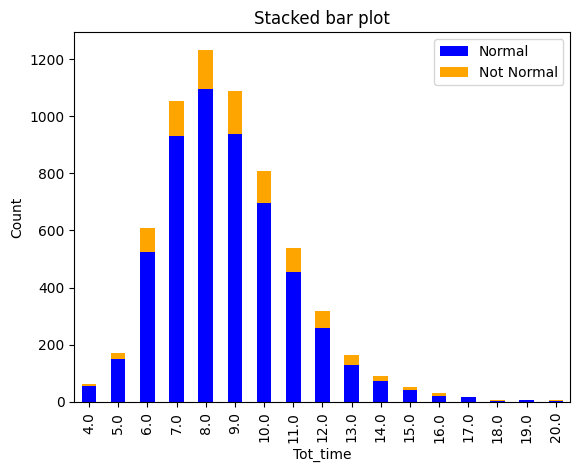

In [ ]:
#Creating a stacked bar plot for further research

#Changeables
vis_attr = "Tot_time"
vis_split = "SDQcategorical"


#Prepare the dataset

data = kig[[vis_attr,vis_split]]
legend_labels = ["Normal", "Not Normal"]

# count the frequencies
counts = data.groupby([vis_attr, vis_split]).size().reset_index(name='counts')

# pivot the table to create a stacked bar plot
pivoted = counts.pivot(index=vis_attr, columns=vis_split, values='counts')

# plot the stacked bar chart with the specified colors
ax = pivoted.plot(kind='bar', stacked=True, color=['blue', 'orange'])

ax.set_xlabel(vis_attr)
ax.set_ylabel("Count")
ax.set_title("Stacked bar plot")
ax.legend(labels=legend_labels)


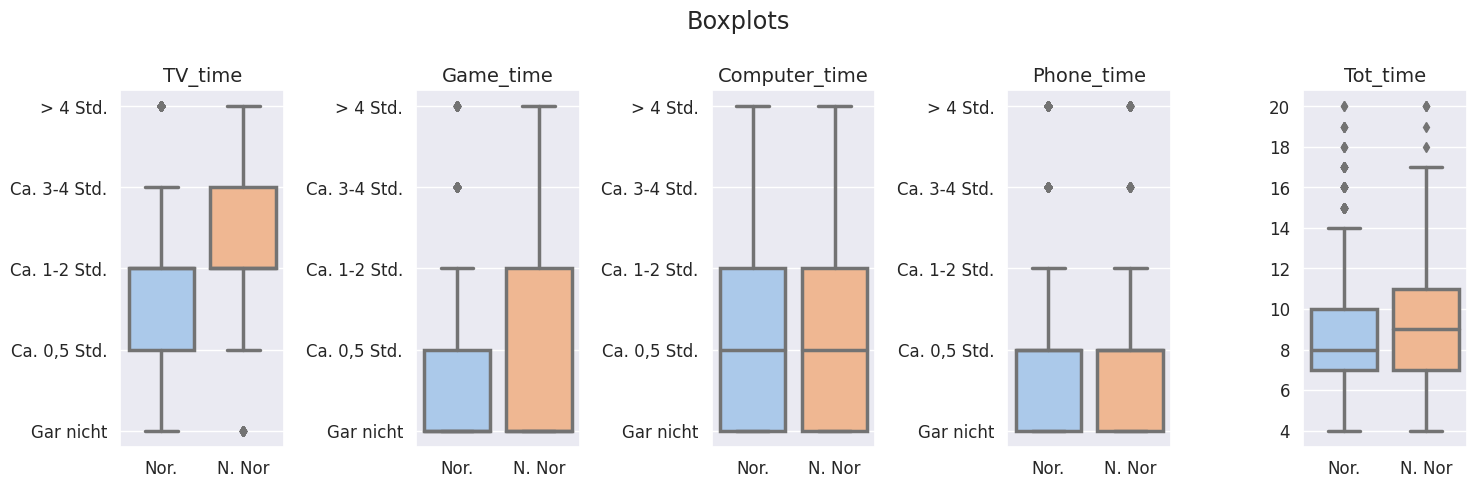

In [ ]:
#####Creating boxplots for analyzing the distribution´´

###Changables
vis_attr = ["TV_time","Game_time","Computer_time","Phone_time","Tot_time"]
vis_split = ["SDQcategorical"]


### Prepare the data
data = kig[vis_attr + vis_split]
data = data.apply(pd.to_numeric)

legend_labels = ["Nor.", "N. Nor"]


# Set the style of the plots
sns.set_style("whitegrid")

# Set the font size for the plots
sns.set(font_scale=1.2)

# Create subplots for each variable
fig, axs = plt.subplots(1,len(vis_attr), figsize=(15,5))

# Loop through each variable and plot a boxplot
for i, var in enumerate(vis_attr):
    sns.boxplot(x=vis_split[0], y=var, data=data, ax=axs[i], palette='pastel', linewidth=2.5)
    axs[i].set_xlabel("")
    axs[i].set_title(var, fontsize=14)
    axs[i].set_ylabel("")
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].set_xticks(ticks=[0,1],labels= legend_labels)
    if var != "Tot_time":
      y_labels = meta.variable_value_labels.get(new_columns[var],{})
      y_labels_list = list(y_labels.values())
      y_labels_list.pop(0)
      axs[i].set_yticks(ticks=[1, 2, 3, 4,5], labels = y_labels_list)

# Show the plot

plt.suptitle("Boxplots")
plt.tight_layout()
plt.show()

TV time is the most different in both groups. Kids with not normal mental SDQ scores having higher TV screetime and slightly higher overall screen time

## Gender and Total time

Gender: Since Tot_time is not normally distributed, we can use a non-parametric test, such as the Mann-Whitney U test, to test for a significant difference between genders.

In [ ]:
from scipy.stats import mannwhitneyu

data = kig[["Tot_time","sex"]]

male_tot_time = data[data['sex'] == 1]['Tot_time']
female_tot_time = data[data['sex'] == 2]['Tot_time']

statistic, p_value = mannwhitneyu(male_tot_time, female_tot_time)

print("Mann-Whitney U test statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference between genders for Tot_time.")
else:
    print("There is no significant difference between genders for Tot_time.")





Mann-Whitney U test statistic: 5774014.5
p-value: 7.607843831082358e-37
There is a significant difference between genders for Tot_time.


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


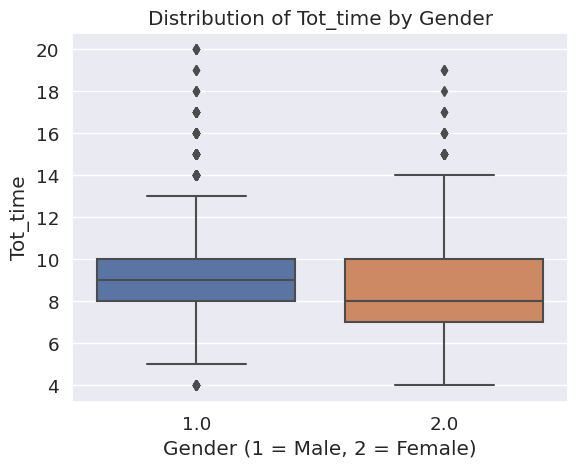

In [ ]:
#Add some visualization
# Create a box plot to compare Tot_time between genders
sns.boxplot(x="sex", y="Tot_time", data=data)
plt.title("Distribution of Tot_time by Gender")
plt.xlabel("Gender (1 = Male, 2 = Female)")
plt.ylabel("Tot_time")
plt.show()

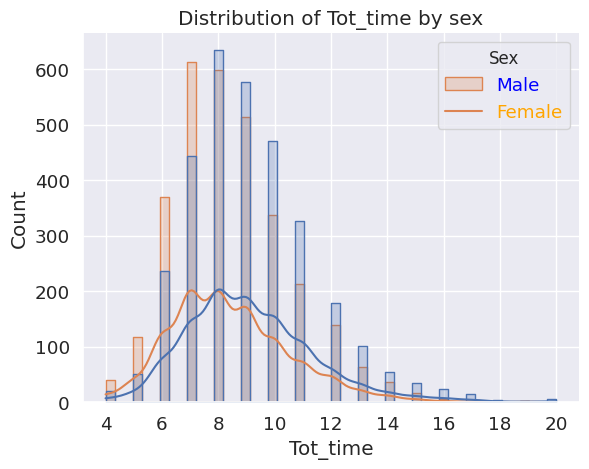

In [ ]:
# Plot distribution of Tot_time by sex
sns.histplot(data=data, x='Tot_time', hue='sex', element='step', kde=True)
sns.despine()
plt.title("Distribution of Tot_time by sex")
plt.xlabel("Tot_time")
legend = plt.legend(title="Sex", labels=["Male", "Female"], labelcolor = ["blue","orange"])
legend.get_title().set_fontsize('12')
plt.show()

## Age groups and Total screentime


In [ ]:
from scipy.stats import kruskal

data = kig[["age2","Tot_time"]]
group1 = data[data['age2'] == 6]['Tot_time']
group2 = data[data['age2'] == 7]['Tot_time']
group3 = data[data['age2'] == 8]['Tot_time']
group4 = data[data['age2'] == 9]['Tot_time']

stat, p = kruskal(group1, group2, group3, group4)

print('Kruskal-Wallis test statistic:', stat)
print('p-value:', p)

Kruskal-Wallis test statistic: 369.59952464898265
p-value: 8.500785104977246e-80


Since the p-value is much less than the significance level of 0.05, we can reject the null hypothesis and conclude that there is a significant difference between the medians of the Tot_time attribute across the four age groups.

But where?

In [ ]:
pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

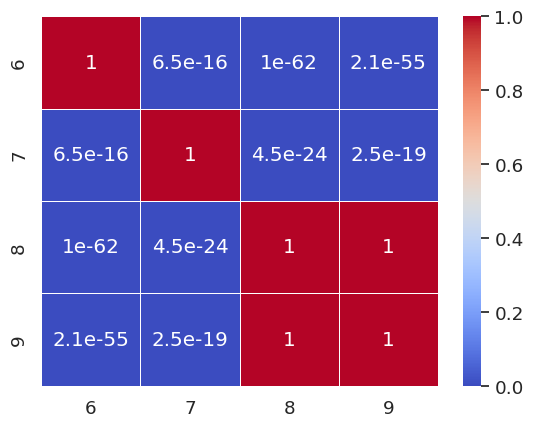

In [ ]:
import scikit_posthocs as sp

# separate Tot_time data for each age group
data_6 = data[data['age2'] == 6]['Tot_time']
data_7 = data[data['age2'] == 7]['Tot_time']
data_8 = data[data['age2'] == 8]['Tot_time']
data_9 = data[data['age2'] == 9]['Tot_time']

# perform Dunn's test with Bonferroni correction
p_values = sp.posthoc_dunn([data_6, data_7, data_8, data_9], p_adjust='bonferroni')

# create heatmap visualization of p-values
sns.set(font_scale=1.2)
sns.heatmap(p_values, annot=True, cmap='coolwarm', linewidths=0.5,
            xticklabels=['6', '7', '8', '9'], yticklabels=['6', '7', '8', '9'])


Based on the matrix of p-values, we can conclude that all pairwise comparisons are statistically significant at the adjusted significance level, except for the comparison between age group 8 and age group 9, where the p-value is greater than 0.00833 (i.e., 1.000000e+00). Therefore, we can conclude that there is a significant difference in Tot_time between most of the age groups, except for age groups 8 and 9, where the difference is not statistically significant at the adjusted significance level.

# Machine Learning: 

In [ ]:
y = kig.SDQcategorical #creating x set
x = kig.drop(['SDQcategorical','SDQmetric'], axis=1) #creating y set

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True, stratify=y) #creating the test and train sets

x_train.head()

,sex,age2,ses,TV_time,Game_time,Computer_time,Phone_time,Tot_time
10734,2.0,8.0,1.0,4.0,1.0,3.0,2.0,10.0
11120,1.0,8.0,2.0,3.0,1.0,3.0,2.0,9.0
15478,1.0,9.0,2.0,5.0,3.0,4.0,2.0,14.0
1202,2.0,6.0,1.0,4.0,1.0,1.0,2.0,8.0
3410,1.0,7.0,1.0,3.0,1.0,3.0,1.0,8.0


In [ ]:
print("Size x_train: ", x_train.shape)
print("Size x_test: ", x_test.shape)

print("Size y_train", y_train.shape)
print("Size y_test", y_test.shape)

Size x_train:  (4374, 8)
Size x_test:  (1875, 8)
Size y_train (4374,)
Size y_test (1875,)


0.0    5391
1.0     858
Name: SDQcategorical, dtype: int64


<Axes: ylabel='Type'>

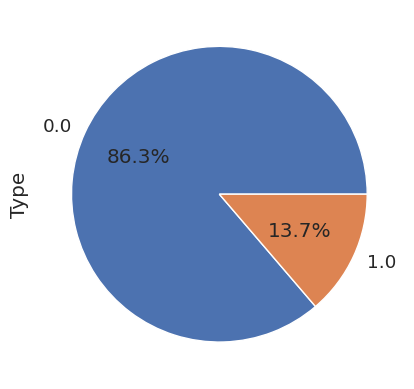

In [ ]:
print(kig["SDQcategorical"].value_counts())

kig.groupby('SDQcategorical').size().plot(kind='pie',
                                       y = "SDQcategorical",
                                       label = "Type",
                                       autopct='%1.1f%%')

The Dataset is unbalanced, therefore let us upsample the not normal category to 50% of the dataset. 


In [ ]:
from sklearn.utils import resample

SDQ_0 = kig[kig["SDQcategorical"] == 0.0] #copying all the data from SDQ categorical that equals 0
SDQ_1  = kig[kig["SDQcategorical"] == 1.0] #copying all the data from SDQ categorical that equals 1

print(SDQ_0.shape)
print(SDQ_1.shape)

(5391, 10)
(858, 10)


(5391, 10)
0.0    5391
1.0    5391
Name: SDQcategorical, dtype: int64


<Axes: ylabel='Type'>

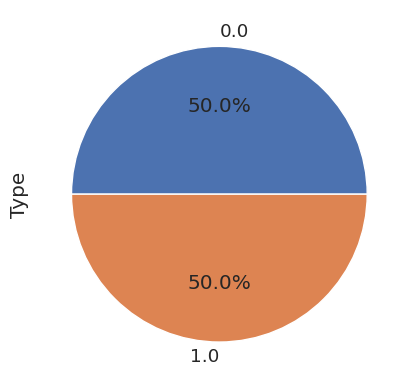

In [ ]:
#Creating the upsample object
x_upsample = resample(SDQ_1,
             replace=True,
             n_samples=len(SDQ_0),
             random_state=42)

print(x_upsample.shape)

#Creating the new upsampled dataset
data_upsampled = pd.concat([x_upsample, SDQ_0])


print(data_upsampled["SDQcategorical"].value_counts())

data_upsampled.groupby('SDQcategorical').size().plot(kind='pie',
                                       y = "SDQcategorical",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
#Doing this step again

y = data_upsampled.SDQcategorical #we are now using the upsampled data
x = data_upsampled.drop(['SDQcategorical','SDQmetric','age2','sex','ses'], axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True, stratify=y) #Creating the test and train set again for the new upsampled dataset

x_train.head()

,TV_time,Game_time,Computer_time,Phone_time,Tot_time
620,2.0,1.0,2.0,2.0,7.0
9170,5.0,1.0,1.0,5.0,12.0
2415,3.0,4.0,3.0,3.0,13.0
3881,3.0,2.0,2.0,1.0,8.0
9719,4.0,4.0,3.0,3.0,14.0


## Simple logistic regression using various screen time variables to predict mental health

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
features = {'TV_time','Game_time','Computer_time','Phone_time','Tot_time'}
logreg_ = {}
train_ = {}
test_ = {}

for feature in features:
  train_[feature] = x_train[feature].values.reshape(-1,1) #Reshaping of the arrays to get them from shape [R,] to shape [R,1]
  logreg_[feature] = LogisticRegression(max_iter=1000) #Creating the logistic regression model for each feature inside the dictionary
  logreg_[feature].fit(train_[feature], y_train) #Training each model
  test_[feature] = x_test[feature].values.reshape(-1,1) #Reshaping each test set
  print("Accuracy of", feature, ": ", logreg_[feature].score(test_[feature], y_test)) #Printing the Accuracy of each logistic regression

Accuracy of TV_time :  0.5230293663060278
Accuracy of Computer_time :  0.5088098918083462
Accuracy of Tot_time :  0.5304482225656878
Accuracy of Phone_time :  0.5248840803709428
Accuracy of Game_time :  0.5703245749613601


Confusion Matrix for logistic regression with variable: TV_time


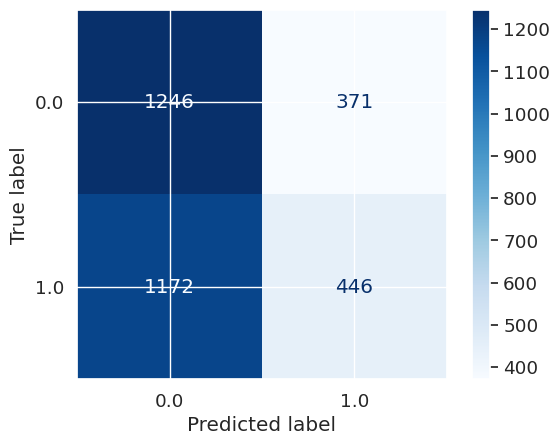

Confusion Matrix for logistic regression with variable: Computer_time


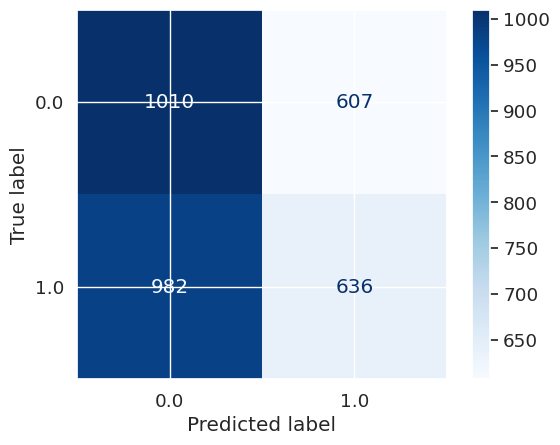

Confusion Matrix for logistic regression with variable: Tot_time


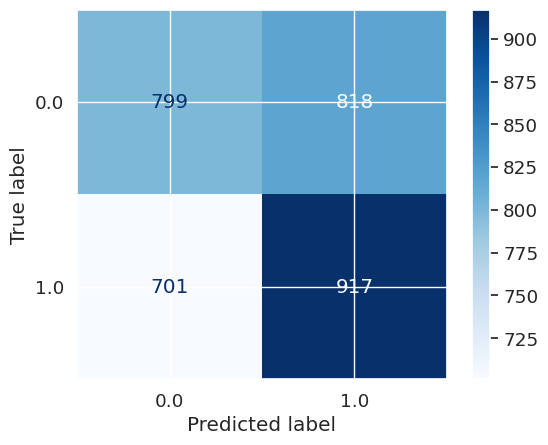

Confusion Matrix for logistic regression with variable: Phone_time


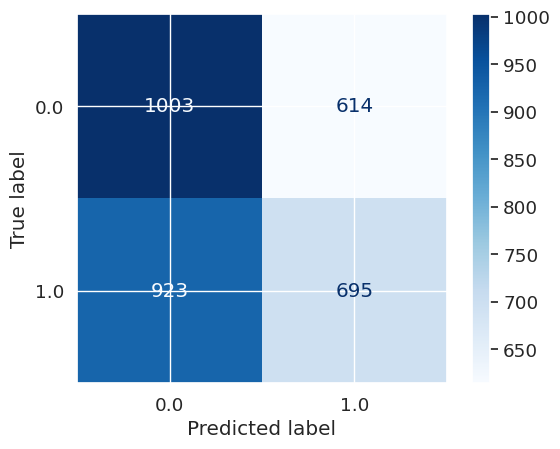

Confusion Matrix for logistic regression with variable: Game_time


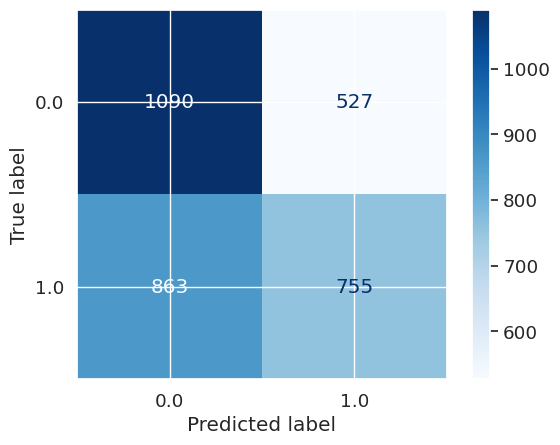

In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_ = {} #array for the predicted values
cm_ = {} #array for the confusion matrix


for feature in liste:
  y_pred_[feature] = logreg_[feature].predict(test_[feature]) #filling the array with all the predicted values for each feature
  cm_[feature] = confusion_matrix(y_test, y_pred_[feature], labels=logreg_[feature].classes_) #filling the array with all the cm models for each feature
  print("Confusion Matrix for logistic regression with variable:", feature)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm_[feature],display_labels=logreg_[feature].classes_) #displaying the confusion matrix
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

In [ ]:
pd.to_numeric(y_test).mean() #The mean of the test set

0.5001545595054095

## Logistic Regression model using screentime variables and the others

In [ ]:
y = data_upsampled.SDQcategorical 
x = data_upsampled.drop(['SDQcategorical','SDQmetric','Tot_time'], axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True, stratify=y) #Creating the test and train set again for the new upsampled dataset

x_train.head()

,sex,age2,ses,TV_time,Game_time,Computer_time,Phone_time
620,1.0,7.0,3.0,2.0,1.0,2.0,2.0
9170,2.0,8.0,1.0,5.0,1.0,1.0,5.0
2415,2.0,7.0,1.0,3.0,4.0,3.0,3.0
3881,1.0,7.0,3.0,3.0,2.0,2.0,1.0
9719,1.0,7.0,1.0,4.0,4.0,3.0,3.0


In [ ]:
logreg_all = LogisticRegression(max_iter=1000) #Creating the logistic regression model for each feature inside the dictionary
logreg_all.fit(x_train, y_train) #Training each model
print("Accuracy of model with all variables: ", logreg_all.score(x_test, y_test)) #Printing the Accuracy of each logistic regression

Accuracy of model with all variables:  0.6034003091190108


Confusion Matrix for logistic regression with all variables


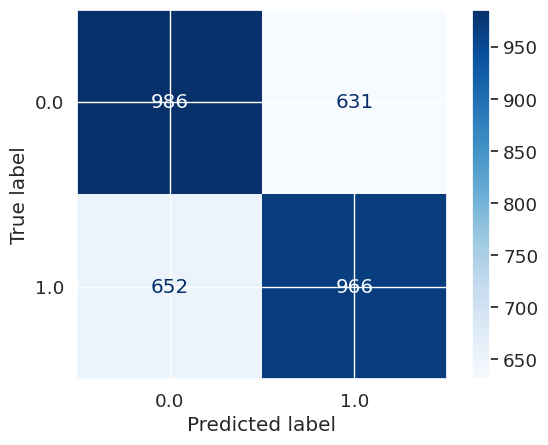

In [ ]:
y_pred_all = logreg_all.predict(x_test)
cm_all = confusion_matrix(y_test, y_pred_all, labels=logreg_all.classes_) 
print("Confusion Matrix for logistic regression with all variables")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_all,display_labels=logreg_all.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## KNN Model

In [ ]:
#Classification using Simple knn 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

In [ ]:
y = data_upsampled.SDQcategorical
x = data_upsampled.drop(['SDQcategorical','SDQmetric','Tot_time'], axis=1)

# Using the standard scaler on x_train and x_test
x_train_norm = scaler.fit_transform(x_train.values)  
x_test_norm = scaler.transform(x_test.values)

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5) # Simple model KNN using 5 nearest neighbors

knn_5.fit(x_train_norm, y_train)    # fitting 
knn_5_predict = knn_5.predict(x_test_norm)  # predicting for test sample

In [ ]:
print("Accuracy: ", knn_5.score(x_test_norm, y_test))

Accuracy:  0.7171561051004637


Accuracy  =     0.717
Precision =     0.691
Recall    =     0.787
F1_score  =     0.736


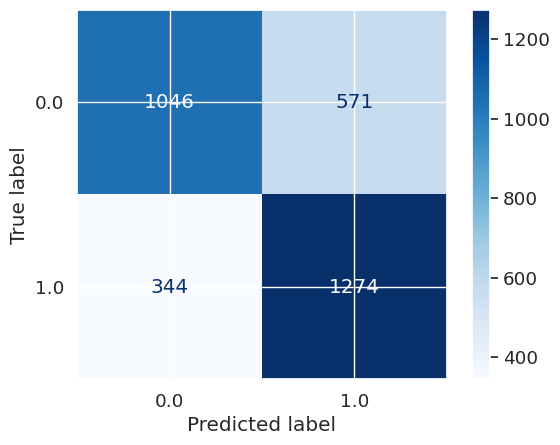

In [ ]:
#Confusion Matrix and Evaluation metrics
cm = confusion_matrix(y_test, knn_5_predict, labels=knn_5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_5.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show metrics function
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))
    
show_metrics()

KNN using Grid Search to optmize accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(3,30,2))  # creating odd number values between 3 and 29 for n_neighbors
param_grid = dict(n_neighbors=k_range) # Initiating the parameter grid for GridSearchCV
print(param_grid)

{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}


In [ ]:
# Fitting GridSearchCv model
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False) 
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]},
             scoring='accuracy')

In [ ]:
grid_mean_scores = grid.cv_results_['mean_test_score']  # Mean accuracy for each n_neighbor value
print(grid_mean_scores)

[0.71750505 0.70584573 0.6937866  0.68795791 0.68319286 0.68067103
 0.67338416 0.6703378  0.66092979 0.65775063 0.6573524  0.65417342
 0.64940134 0.64900188]


Text(0, 0.5, 'Cross-Validated Accuracy')

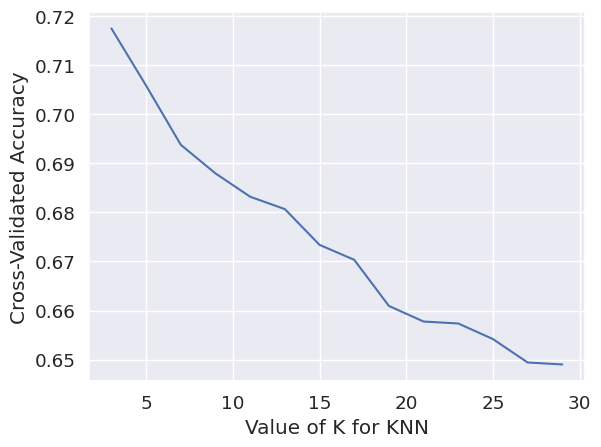

In [ ]:
# Plotting the accuracy scores
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
# Best parameters and accuracy
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7175050503276126
{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


In [ ]:
# fitting and predicting with the best model
knn_best = grid.best_estimator_
knn_best.fit(x_train_norm, y_train)
knn_best_predict = knn_best.predict(x_test_norm)

Accuracy  =     0.738
Precision =     0.712
Recall    =     0.801
F1_score  =     0.754


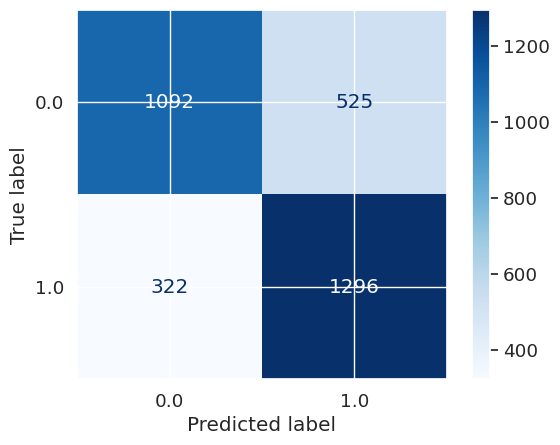

In [ ]:
cm = confusion_matrix(y_test, knn_best_predict, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot(cmap=plt.cm.Blues)
show_metrics()

The accuracy score on the test set improved using GridSearchCV. In general, KNN has better evaluation scores than the regression models

## Clusering using Density-based spatial clustering of applications with noise (DBSCAN)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import v_measure_score

In [ ]:
dbscan_cluster = DBSCAN(eps=2, min_samples=200)
dbscan_cluster.fit(x_train_norm)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y_train, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 271
v_measure = 0.01399165310321631


In [ ]:
dbscan_cluster.core_sample_indices_

array([   0,    3,    5, ..., 7543, 7544, 7545])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Number of target dimensions
pc = pca.fit_transform(x_train_norm)
component_contributions = pca.components_.round(2)
explained_variance = pca.explained_variance_ratio_

<Axes: >

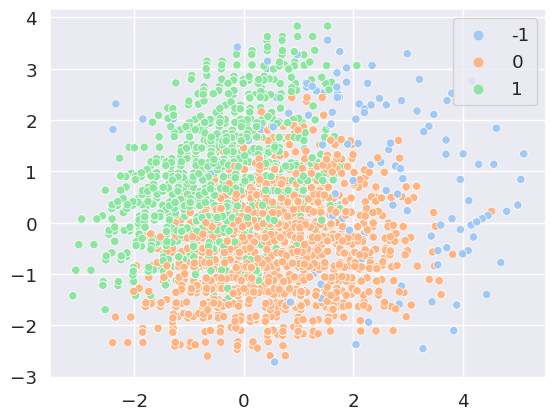

In [ ]:
# Visualizing DBSCAN clustering after PCA
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=dbscan_cluster.labels_, palette="pastel")

<Axes: >

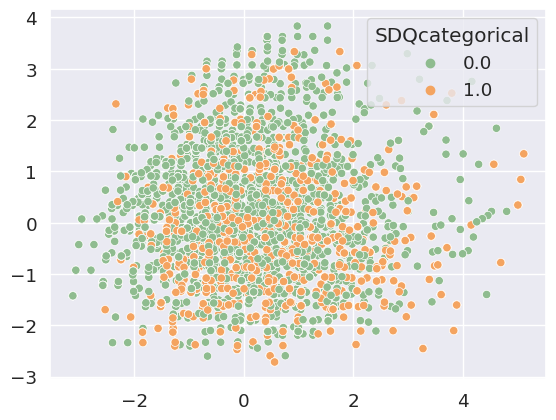

In [ ]:
# Visualizing with original results after PCA
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=y_train, palette=["darkseagreen",'sandybrown'])